<a href="https://colab.research.google.com/github/aravindh698/rep2/blob/master/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [62]:
df=pd.read_csv('GOLD.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      512 non-null    object 
 1   Price     512 non-null    int64  
 2   Open      512 non-null    int64  
 3   High      512 non-null    int64  
 4   Low       512 non-null    int64  
 5   Vol.      512 non-null    object 
 6   Change %  512 non-null    object 
 7   Pred      411 non-null    float64
 8   new       512 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [64]:
df.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [72]:
df['Pred'].fillna(inplace=True)
cdf=df[['Price','High','Low','Vol.','Pred','new']]
cdf.head(9)

NameError: ignored

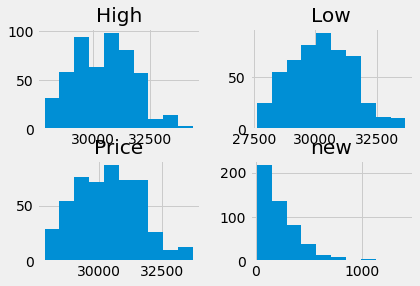

In [70]:
viz=cdf[['Price','High','Low','Vol.','Pred','new']]
viz.hist()
plt.show()

ValueError: ignored

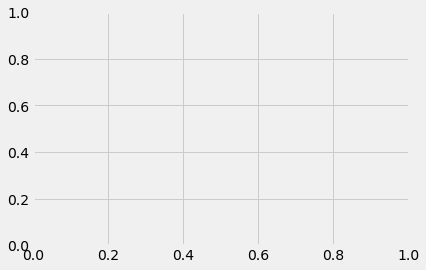

In [71]:
msk=np.random.rand(len(df)) < 0.8
train=cdf[msk]
test=cdf[~msk]
plt.scatter(train.Price,train.Pred,color='blue')
plt.xlabel("Price")
plt.ylabel("Pred")
plt.show()

In [0]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['Price']])
train_y=np.asanyarray(train[['Pred']])
regr.fit(train_x,train_y)
print('coeff',regr.coef_)
print('intercept',regr.intercept_)